<a href="https://colab.research.google.com/github/sanjeevrs2000/CS6910-Assignment-2/blob/main/Assignment_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

     |████████████████████████████████| 2.1MB 11.4MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 133kB 39.5MB/s 
     |████████████████████████████████| 163kB 38.2MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=fc2a69c7114c2751fc738828d601f7ee14599eeaf12befc517647a55f3d7a23a
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=b0afd28cee98f12e968d52366543b0d06a2137a5fefc50ed5cc1e096695b45ad
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [2]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
import cv2
import wandb

In [3]:
%%capture
!curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > nature_12K.zip
!unzip nature_12K.zip

train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
categories=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

In [ ]:
model=models.Sequential()

model.add(Conv2D(64, (3, 3),input_shape=(img_height,img_width,3),activation='relu'))    
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128,activation='relu')) #change dense layer size
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 298, 298, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)       

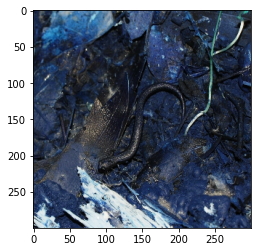

In [ ]:
#visualizing an image 
for category in categories:
  dir=os.path.join(train_dir,category)
  for img in os.listdir(dir):
    imgs=cv2.imread(os.path.join(dir,img))
    new_img=cv2.resize(imgs,(300,300))
    plt.imshow(new_img)
    break
  break

In [4]:
img_height=300
img_width=300

augment= ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255,
    validation_split=0.1
)

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.1
)

train_set = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
    subset='training',
    seed=123,
)

val_set = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
    subset='validation',
    seed=123,
)


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.


In [ ]:
#sample run
wandb.init(entity='sanjeev-nimeesh',project='assignment_2')

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=[tf.keras.losses.SparseCategoricalCrossentropy()],
    metrics=['accuracy'],
)

model.fit(train_set,epochs=10,validation_data=val_set,callbacks=[WandbCallback()])


Epoch 1/10
282/282 [==============================] - 181s 520ms/step - loss: 2.5504 - accuracy: 0.1827 - val_loss: 3.2305 - val_accuracy: 0.1121
Epoch 2/10
282/282 [==============================] - 140s 496ms/step - loss: 2.1991 - accuracy: 0.2470 - val_loss: 2.1046 - val_accuracy: 0.2523
Epoch 3/10
282/282 [==============================] - 134s 475ms/step - loss: 2.0427 - accuracy: 0.2935 - val_loss: 2.1082 - val_accuracy: 0.2853
Epoch 4/10
282/282 [==============================] - 132s 469ms/step - loss: 1.9625 - accuracy: 0.3134 - val_loss: 2.1450 - val_accuracy: 0.2833
Epoch 5/10
282/282 [==============================] - 136s 483ms/step - loss: 1.8666 - accuracy: 0.3433 - val_loss: 2.2123 - val_accuracy: 0.2653
Epoch 6/10
282/282 [==============================] - 131s 465ms/step - loss: 1.8072 - accuracy: 0.3596 - val_loss: 1.9159 - val_accuracy: 0.3323
Epoch 7/10
282/282 [==============================] - 136s 483ms/step - loss: 1.6922 - accuracy: 0.4087 - val_loss: 2.0204 -

In [5]:
sweep_config = {
  'name': 'sweep1',  
  'method': 'grid',
  'parameters': {
        
        'filters': {
            'values': ['all_64','inc','dec']
        },
        'fc_size':{
            'values':[64,128,256]
        },
        'batchnorm':{
            'values':['yes']
        },
        'augmentation':{
            'values':['no']   
        },
        'droprate':{
            'values':[0.3,0.5]
        }
           
    }

}

config_defaults={
    'filters':[64,64,64,64,64],
    'fc_size':64,
    'batchnorm':'yes',
    'augmentation':'no',
    'droprate':0.3
}

In [15]:
def Train_CNN():

  wandb.init(config=config_defaults)
  configs=wandb.config

  batchnorm=configs['batchnorm']
  droprate=configs['droprate']
  augmentation=configs['augmentation']
  filter_=configs['filters']
  fc_size=configs['fc_size']

  wandb.run.name='filters_'+filter_+'_droprate_'+str(droprate)+ str('_bn_' if batchnorm=='yes' else '') +str('augment' if augmentation=='yes' else '')

  if filter_ == 'all_64':
    filters=[64,64,64,64,64]
  elif filter_=='all_32' :
    filters=[32,32,32,32,32]
  elif filter_=='inc' :
    filters=[16,32,64,128,256]
  elif filter_ == 'dec' :
    filters=[256,128,64,32,16]


  img_height,img_width=300,300

  model=models.Sequential()

  model.add(Conv2D(filters[0], (3, 3),input_shape=(img_height,img_width,3),activation='relu'))    
  if batchnorm =='yes':
    model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(filters[1], (3, 3),activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(filters[2], (3, 3),activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(filters[3], (3, 3),activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(filters[4], (3, 3),activation='relu'))
  if batchnorm =='yes':
    model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(fc_size,activation='relu')) 
  if batchnorm =='yes':
    model.add(BatchNormalization())
  model.add(Dropout(droprate))

  model.add(Dense(10,activation='softmax'))


  augment= ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255,
    validation_split=0.1,
    dtype=tf.float32,
  )

  datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.1,
    dtype=tf.float32,
  )

  train_set = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
    subset='training',
    seed=123,
  )

  aug_set = augment.flow_from_directory(
      train_dir,
      target_size=(img_height, img_width),
      batch_size=32,
      color_mode='rgb',
      class_mode='sparse',
      shuffle=True,
      subset='training',
      seed=123,
  )

  val_set = datagen.flow_from_directory(
      train_dir,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='sparse',
      shuffle=True,
      subset='validation',
      seed=123,
  )

  model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=[tf.keras.losses.SparseCategoricalCrossentropy()],
    metrics=['accuracy'],
  )

  if augmentation =='no' :
    hist=model.fit(train_set,epochs=10,validation_data=val_set,callbacks=[WandbCallback()])
  
  else:
    hist=model.fit(aug_set,epochs=10,validation_data=val_set,callbacks=[WandbCallback()])
    val_acc=max(hist.history['val_accuracy'])
  params={'batch_norm':batchnorm,'augmentation':augmentation,'dropout':droprate,'filter_architecture':filter_,'val_acc':val_acc}
  wandb.log(params)

In [ ]:
sweep_id=wandb.sweep(sweep_config,entity='sanjeev-nimeesh',project='assignment_2')
wandb.agent(sweep_id, Train_CNN)         

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: z4v5hj7c
Sweep URL: https://wandb.ai/sanjeev-nimeesh/assignment_2/sweeps/z4v5hj7c


wandb: Agent Starting Run: d0fwtqnc with config:
wandb: 	augmentation: no
wandb: 	batchnorm: yes
wandb: 	droprate: 0.3
wandb: 	fc_size: 64
wandb: 	filters: all_64


Found 9000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Epoch 1/10
282/282 [==============================] - 169s 595ms/step - loss: 2.4975 - accuracy: 0.1895 - val_loss: 2.9615 - val_accuracy: 0.1271
Epoch 2/10
282/282 [==============================] - 165s 584ms/step - loss: 2.1244 - accuracy: 0.2655 - val_loss: 2.0792 - val_accuracy: 0.2613
Epoch 3/10
282/282 [==============================] - 165s 586ms/step - loss: 2.0201 - accuracy: 0.2888 - val_loss: 2.1158 - val_accuracy: 0.2793
Epoch 4/10
282/282 [==============================] - 161s 571ms/step - loss: 1.9385 - accuracy: 0.3104 - val_loss: 2.0864 - val_accuracy: 0.2873
Epoch 5/10
282/282 [==============================] - 160s 568ms/step - loss: 1.8718 - accuracy: 0.3435 - val_loss: 2.0469 - val_accuracy: 0.2933
Epoch 6/10
282/282 [==============================] - 160s 567ms/step - loss: 1.8136 - accuracy: 0.3593 - val_loss: 1.9833 - val_accuracy: 0.3

epoch,9
loss,1.62497
accuracy,0.43578
val_loss,1.91691
val_accuracy,0.34835
_runtime,1609
_timestamp,1617999872
_step,9
best_val_loss,1.90695
best_epoch,8


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▃▂▂▂▁
accuracy,▁▃▃▄▅▆▆▇▇█
val_loss,█▂▂▂▂▂▂▄▁▁
val_accuracy,▁▅▆▆▆▇▆▅▇█
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


Run d0fwtqnc errored: UnboundLocalError("local variable 'val_acc' referenced before assignment")
wandb: ERROR Run d0fwtqnc errored: UnboundLocalError("local variable 'val_acc' referenced before assignment")
wandb: Agent Starting Run: 3hzx0ycg with config:
wandb: 	augmentation: no
wandb: 	batchnorm: yes
wandb: 	droprate: 0.3
wandb: 	fc_size: 64
wandb: 	filters: inc


Found 9000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Epoch 1/10
282/282 [==============================] - 142s 495ms/step - loss: 2.5145 - accuracy: 0.1753 - val_loss: 2.4227 - val_accuracy: 0.1672
Epoch 2/10
123/282 [============>.................] - ETA: 1:10 - loss: 2.1211 - accuracy: 0.2777